In [1]:
#  Importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

Data Cleaning

In [2]:
df = pd.read_csv('Uncleaned_employees_final_dataset.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [3]:
#  Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [4]:
# Missing alues being droped, having missing values in eduation and previous_year_rating
df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

In [5]:
# Handling missing values 
df.dropna(inplace=True)
df.isnull().sum()

employee_id              0
department               0
region                   0
education                0
gender                   0
recruitment_channel      0
no_of_trainings          0
age                      0
previous_year_rating     0
length_of_service        0
KPIs_met_more_than_80    0
awards_won               0
avg_training_score       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15424 entries, 1 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            15424 non-null  int64  
 1   department             15424 non-null  object 
 2   region                 15424 non-null  object 
 3   education              15424 non-null  object 
 4   gender                 15424 non-null  object 
 5   recruitment_channel    15424 non-null  object 
 6   no_of_trainings        15424 non-null  int64  
 7   age                    15424 non-null  int64  
 8   previous_year_rating   15424 non-null  float64
 9   length_of_service      15424 non-null  int64  
 10  KPIs_met_more_than_80  15424 non-null  int64  
 11  awards_won             15424 non-null  int64  
 12  avg_training_score     15424 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.6+ MB


In [7]:
# Checking for duplicates
df.duplicated(keep=False).sum()

3

In [8]:
df.drop_duplicates( inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15422 entries, 1 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            15422 non-null  int64  
 1   department             15422 non-null  object 
 2   region                 15422 non-null  object 
 3   education              15422 non-null  object 
 4   gender                 15422 non-null  object 
 5   recruitment_channel    15422 non-null  object 
 6   no_of_trainings        15422 non-null  int64  
 7   age                    15422 non-null  int64  
 8   previous_year_rating   15422 non-null  float64
 9   length_of_service      15422 non-null  int64  
 10  KPIs_met_more_than_80  15422 non-null  int64  
 11  awards_won             15422 non-null  int64  
 12  avg_training_score     15422 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.6+ MB


In [9]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')

In [10]:
# Rename the Colonmns to make it descriptive, and drop employee id
df = df.rename(columns= { 'department': 'Department', 'region': 'Region','education': 'Education', 'gender': 'Gender',
'recruitment channel': 'Recruitment Channel', 'no_of_trainings': 'Total Trainings', 'age': 'Age',
'previous year _rating': 'Previous Rating', 'length_of_service': 'Tenure' , 'KPIS_ met _more_than_80': 'KPIS > 80',
'awards won': 'Total Awards',
'avg_training_ score': 'Average Training Score'})

df.drop(columns =['employee_id'], inplace=True)
df.head()

,Department,Region,Education,Gender,recruitment_channel,Total Trainings,Age,previous_year_rating,Tenure,KPIs_met_more_than_80,awards_won,avg_training_score
1,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
5,Procurement,region_7,Bachelors,m,sourcing,1,36,3.0,2,0,0,68


In [11]:
 ## EDA and Feature Engineering


In [12]:
df['Region'].unique()

array(['region_4', 'region_13', 'region_2', 'region_29', 'region_7',
       'region_22', 'region_16', 'region_17', 'region_24', 'region_11',
       'region_27', 'region_9', 'region_20', 'region_34', 'region_23',
       'region_8', 'region_14', 'region_26', 'region_31', 'region_19',
       'region_28', 'region_15', 'region_3', 'region_25', 'region_12',
       'region_30', 'region_10', 'region_33', 'region_32', 'region_5',
       'region_6', 'region_21', 'region_1', 'region_18'], dtype=object)

In [13]:
# Grouping the regions into zones for better understanding, region 1-10 are in zone 1, 11-20 in zone 2, 21-30 in zone 3, 31-40 in zone 4, 41-50 in zone 5

def map_region(region):
    if region in ['region_1', 'region_2','region_3','region_4','region_5','region_6','region_7','region_8','region_9','region_10']:
        return 'Provience 1'
    elif region in ['region_11','region_12','region_13','region_14','region_15','region_16','region_17','region_18','region_19','region_20']:
        return 'Provience 2'
    elif region in ['region_21','region_22','region_23','region_24','region_25','region_26','region_27','region_28','region_29','region_30']:
        return 'Provience 3'
    elif region in ['region_31','region_32','region_33','region_34','region_35','region_36','region_37','region_38','region_39','region_40']:
        return 'Provience 4'
    else:
        return 'Provience 6'

df['Provience'] = df['Region'].apply(map_region)
df.head()


,Department,Region,Education,Gender,recruitment_channel,Total Trainings,Age,previous_year_rating,Tenure,KPIs_met_more_than_80,awards_won,avg_training_score,Provience
1,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51,Provience 1
2,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47,Provience 2
3,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65,Provience 1
4,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61,Provience 3
5,Procurement,region_7,Bachelors,m,sourcing,1,36,3.0,2,0,0,68,Provience 1


In [14]:
df.drop(columns = ['Region'], inplace=True)

In [15]:
df['Provience'].unique()

array(['Provience 1', 'Provience 2', 'Provience 3', 'Provience 4'],
      dtype=object)

In [16]:
df['Department'].unique()

array(['HR', 'Sales & Marketing', 'Procurement', 'Finance', 'Analytics',
       'Technology', 'Operations', 'Legal', 'R&D'], dtype=object)

In [17]:
# Departments 
mapping = {
    'Procurement': 'Procurement & Finance', 
    'Finance': 'Procurement & Finance',
    'Analytics': 'Analytics & Technology',
    'Technology': 'Analytics & Technology',
    'Operations': 'Operations & Legal',
    'Legal': 'Operations & Legal'
}

df['Departments'] = df['Department'].replace(mapping)
df.drop(columns = ['Department'], inplace=True)
df.head()

,Education,Gender,recruitment_channel,Total Trainings,Age,previous_year_rating,Tenure,KPIs_met_more_than_80,awards_won,avg_training_score,Provience,Departments
1,Bachelors,f,other,1,31,3.0,5,0,0,51,Provience 1,HR
2,Bachelors,m,other,1,31,1.0,4,0,0,47,Provience 2,Sales & Marketing
3,Bachelors,f,other,3,31,2.0,9,0,0,65,Provience 1,Procurement & Finance
4,Bachelors,m,sourcing,1,30,4.0,7,0,0,61,Provience 3,Procurement & Finance
5,Bachelors,m,sourcing,1,36,3.0,2,0,0,68,Provience 1,Procurement & Finance


In [18]:
df['Education'].unique()

array(['Bachelors', 'Masters & above', 'Below Secondary'], dtype=object)

In [19]:
### 1. Employee Educatoin

In [20]:
education = df['Education'].value_counts().reset_index(name='Count')
education

,Education,Count
0,Bachelors,10464
1,Masters & above,4790
2,Below Secondary,168


In [21]:
# Ingishts 
 # Most of the employees are undergraduates with Bachelor degrees(10464), followed by those with masters (4790) and above.
# 168 employees have below secondary level education

In [22]:
# Departments with most employees
departments = df['Departments'].value_counts().reset_index(name='Count')
departments

,Departments,Count
0,Sales & Marketing,4601
1,Operations & Legal,3571
2,Analytics & Technology,3420
3,Procurement & Finance,2793
4,HR,738
5,R&D,299


In [23]:
## Employee Distribution by Proviene 
provience = df['Provience'].value_counts().reset_index(name='Count')
provience

,Provience,Count
0,Provience 1,6447
1,Provience 3,4450
2,Provience 2,3513
3,Provience 4,1012


In [24]:
# Performance by Gender 
gender = df.groupby(['Gender']).agg({
    'Total Trainings': 'sum',
    'avg_training_score': 'mean',
    'Age': 'mean',
    'Tenure': 'mean',
    'KPIs_met_more_than_80': 'sum',
    'awards_won': 'sum'
}).reset_index()

# Rename 
gender.columns = ['Gender', 'Total Trainings', 'Average Training Score', 'Avg Age', 'Avg Twenure', 'Total KPIS > 80 Achieved', 'Total Awards']
gender

,Gender,Total Trainings,Average Training Score,Avg Age,Avg Twenure,Total KPIS > 80 Achieved,Total Awards
0,f,5405,63.768380,35.693776,6.251789,1790,121
1,m,13834,63.194802,35.605772,6.260845,3786,248


In [25]:
%pip install nbformat>=4.2.0

zsh:1: 4.2.0 not found


Note: you may need to restart the kernel to use updated packages.


In [27]:
fig = px.bar(gender, x='Gender',
              y =['Total Trainings', 'Average Training Score', 'Avg Age', 'Avg Twenure', 'Total KPIS > 80 Achieved', 'Total Awards'], 
              title= "Performance Comparison With Gender", 
              barmode='group')
# Update the layout
fig.update_layout(width=1100, height=600, bargap=0.2)
fig.show()


• Male employees underwent more trainings
• Both gender have almost similar training scores 63
• Average age for both gender is 35
• Average tenure is about 6.2 years
• Male employees achieved more KPIs
• Male employees got most

In [32]:
# Department wise analysis
departments = df.groupby(['Departments']).agg({
    'avg_training_score': 'mean',
    'Age': 'mean',
    'Tenure': 'mean',
    'KPIs_met_more_than_80': 'sum',
    'awards_won': 'sum'
}).reset_index()

# Rename 
departments.columns = ['Departments', 'Average Training Score', 'Avg Age', 'Avg Twenure', 'Total KPIS > 80 Achieved', 'Total Awards']
departments

,Departments,Average Training Score,Avg Age,Avg Twenure,Total KPIS > 80 Achieved,Total Awards
0,Analytics & Technology,81.815205,34.723684,5.971345,1251,90
1,HR,50.388889,35.224932,6.144986,270,14
2,Operations & Legal,60.308317,36.502100,6.602632,1548,91
3,Procurement & Finance,67.696026,35.865736,6.224132,1061,69
4,R&D,84.424749,33.304348,5.183946,137,5
5,Sales & Marketing,50.111063,35.706803,6.312541,1309,100


In [33]:
fig = px.bar(departments, x='Departments',
              y =['Average Training Score', 'Avg Age', 'Avg Twenure', 'Total KPIS > 80 Achieved', 'Total Awards'], 
              title= "Department Comparison", 
              barmode='group')
# Update the layout
fig.update_layout(width=1100, height=600, bargap=0.2)
fig.show()

•R&D department has the best training score
• Operations and Legal has older employees with mean age of 36.5
• Average tenure for employees i Operations and Legal is highest at 6.6
• Operations and legal is the department which achieved more KPIs
• Sales & Marketing got more

Employee Comparision with Eduction

In [40]:
# Performance by Gender 
education = df.groupby(['Education']).agg({
    'Total Trainings': 'mean',
    'avg_training_score': 'mean',
    'Tenure': 'mean',
    'KPIs_met_more_than_80': 'sum',
    'awards_won': 'sum'
}).reset_index()

# Rename 
education.columns = ['Education', 'Average Total Trainings', 'Average Training Score', 'Avg Twenure', 'Total KPIS > 80 Achieved', 'Total Awards']
education

,Education,Average Total Trainings,Average Training Score,Avg Twenure,Total KPIS > 80 Achieved,Total Awards
0,Bachelors,1.256976,63.019973,5.780199,3743,241
1,Below Secondary,1.309524,65.494048,2.297619,74,8
2,Masters & above,1.224635,64.048225,7.441127,1759,120


In [42]:
fig = px.bar(education, x='Education',
              y =['Average Total Trainings', 'Average Training Score', 'Avg Twenure', 'Total KPIS > 80 Achieved', 'Total Awards'], 
              title= "Employee Comparison By Education", 
              barmode='group')
# Update the layout
fig.update_layout(width=1100, height=600, bargap=0.2)
fig.show()

• Employees with Below secondary require more training
• Employees with Below secondary have a higher training scores (maybe because they attend more trainings)
• Employees with masters and above have longer tenures
• Employees with bachelors achieved more KPIs
• Employees with bachelors have more awards

In [45]:
# Region 
Region = df.groupby(['Provience']).agg({
    'Total Trainings': 'sum',
    'avg_training_score': 'mean',
    'KPIs_met_more_than_80': 'sum',
}).reset_index()

# Rename 
Region.columns = ['Provience', 'Total Trainings', 'Average Training Score', 'Total KPIS > 80 Achieved']
Region

,Provience,Total Trainings,Average Training Score,Total KPIS > 80 Achieved
0,Provience 1,8154,63.455716,2390
1,Provience 2,4186,61.911187,1214
2,Provience 3,5688,64.275506,1662
3,Provience 4,1211,63.849802,310


In [47]:
fig = px.bar(Region, x='Provience',
              y =['Total Trainings', 'Average Training Score', 'Total KPIS > 80 Achieved'], 
              title= "Employee Comparison By Provience", 
              barmode='group')
# Update the layout
fig.update_layout(width=1100, height=600, bargap=0.2)
fig.show()

• Employees from region 3 required more training
• Employees from region 1 achieved more KPIs
• Employees region 3 achived highest training

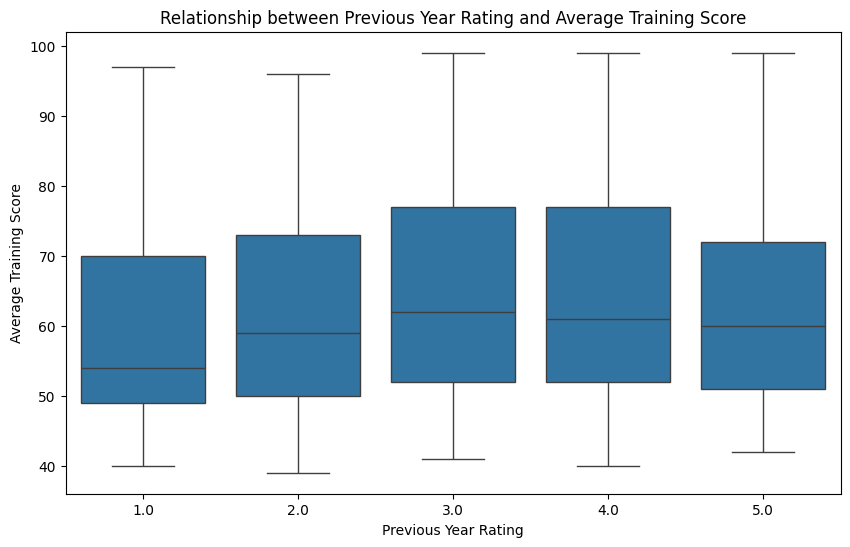

In [48]:
# Previous Rating and Average Training Score
# Region 
plt.figure(figsize=(10,6))

# Create a boxplot to compare the average training score with previous rating 

sns.boxplot(x='previous_year_rating', y='avg_training_score', data=df)

plt.title('Relationship between Previous Year Rating and Average Training Score')
plt.xlabel('Previous Year Rating')
plt.ylabel('Average Training Score')

plt.show()

The plot above compares the performance of employees in different regions. It shows the total number of trainings, average training score, and total number of KPIs achieved greater than 80 for each region.

From the plot, we can observe the following:

Provience 1 has the highest total number of trainings, followed by Provience 3, Provience 2, and Provience 4.
Provience 3 has the highest average training score, followed by Provience 1, Provience 2, and Provience 4.
Provience 1 has the highest total number of KPIs achieved greater than 80, followed by Provience 3, Provience 2, and Provience 4.
This plot provides insights into the performance of employees in different regions based on their training, training scores, and KPI achievements.

• Employees with previous rating of 3 have the highest training scores
• Employees with previous rating 1 have the least traning scores
• Training scores seem to consolidate with pevious rating of 4 and